In [1]:
import networkx as nx
from networkie.gen import Custom
lff = Custom.LoadFromFile()
g = lff.from_in_class_network("dataset/In-class_network.txt")

Name: 
Type: Graph
Number of nodes: 75
Number of edges: 109
Average degree:   2.9067
Edgelist txt data successfully loaded into a networkx Graph!


In [2]:
import numpy as np

#The number of nodes
n = nx.number_of_nodes(g)
print("The number of nodes: %d" % (n))
print("----------------")

#The number of edges
e = nx.number_of_edges(g)
print("The number of edges: %d" % (e))
print("----------------")

#Average degree
degrees = 2*e/n
print("Average degree:",degrees)
print("----------------")

#Average path length & size of the largest connected component
k = g.copy()
count = 0
pathlist = []
component_size = []
k.remove_nodes_from(list(nx.isolates(k)))
connected_components = nx.connected_component_subgraphs(k)
for component in connected_components:
    count = count + 1
    component_size.append(nx.number_of_nodes(component))
    pathlist.append(nx.average_shortest_path_length(component))
l = sum(pathlist)/len(pathlist)
ng = max(component_size)
print("There would be",count,"connected components, and the average path length of each connected component is",pathlist,"all connected components is :", l)
print("The size of the largest connected component: %d" % (ng))
print("----------------")

#fully connected
g_fully_connected = nx.complete_graph(n)
e_max = nx.number_of_edges(g_fully_connected)
e_e_max_rate = e / e_max
print("If the network is fully connected, the max edges would be: %d" % (e_max))
print("The edges of original network divided by max edges would be:",e_e_max_rate)

The number of nodes: 75
----------------
The number of edges: 109
----------------
Average degree: 2.9066666666666667
----------------
There would be 7 connected components, and the average path length of each connected component is [4.721212121212122, 1.8333333333333333, 1.380952380952381, 1.0, 1.3, 1.0, 1.3333333333333333] all connected components is : 1.7955473098330244
The size of the largest connected component: 45
----------------
If the network is fully connected, the max edges would be: 2775
The edges of original network divided by max edges would be: 0.03927927927927928


The list of degree [1, 1, 5, 3, 6, 4, 5, 6, 2, 9, 2, 2, 5, 5, 1, 4, 1, 3, 5, 4, 4, 1, 1, 1, 6, 5, 0, 2, 1, 1, 2, 3, 1, 5, 1, 4, 1, 4, 5, 4, 1, 4, 1, 3, 2, 2, 2, 4, 3, 5, 1, 4, 1, 3, 1, 1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 2, 4, 4, 3, 5, 8, 3, 2, 3, 0]
The degree distribution:


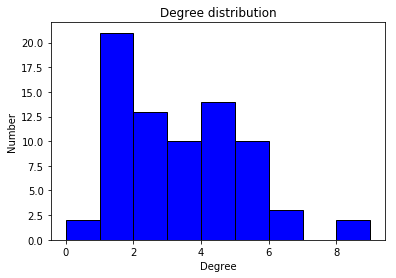

In [3]:
#Plot the degree distribution
import networkx as nx
from networkie.utils import Measures
degree_list = Measures.Node()
g_degree = degree_list.degree_dist(g)
print("The list of degree",g_degree)
import matplotlib.pyplot as plt 
%matplotlib inline
print("The degree distribution:")
g_degree = np.array(g_degree)
y = np.bincount(g_degree)
x = np.nonzero(y)[0]
plt.hist(g_degree, 9, normed=0, facecolor='blue', edgecolor='black',alpha=1,histtype='bar')
plt.xlabel("Degree")
plt.ylabel('Number')
plt.title('Degree distribution')
plt.show()

In [4]:
import networkx as nx
from networkie.utils import Measures
triangles = Measures.compute_num_triangles(g)
print("The total triangle of the graph %d" %(triangles))

The total triangle of the graph 52
